Script 10-1: Creating course data

In [1]:
#import needed packages
import pandas as pd
import numpy as np

In [2]:
#create conditional courses that relate to final exam passage rates

#course 1, with low passage rates in general
course1=np.random.binomial(1,0.75,500)

#course 2, with low passage rates on the first attempt if course 1 was failed
course2a=np.random.binomial(1,0.95,500)
course2b=np.random.binomial(1,0.5,500)
course2=np.where(course1>0,course2a,course2b)

#course 3, with passage rates relative dependent on prior performance
course3a=np.random.binomial(1,0.95,500)
course3b=np.random.binomial(1,0.65,500)
course3=np.where(course2+course1>1,course3a,course3b)

In [3]:
#create two other courses that are not related to performance on final exam
course4=np.random.binomial(1,0.8,200)
course5=np.random.binomial(1,0.85,200)

In [4]:
#create final exam passage rates
passa=np.random.binomial(1,0.95,200)
passb=np.random.binomial(1,0.75,200)
pass_final=np.where(course1+course2+course3>2,course3a,course3b)

In [5]:
Course_Data=pd.DataFrame([course1,course2,course3,course4,course5,pass_final],
                        index=['Course_1','Course_2','Course_3','Course_4',
                              'Course_5','Pass_Final_Exam']).transpose()

Script 10-2: Create a Bayesian Network

In [ ]:
#install bnlearn package if not already in directory and import
!pip install -U bnlearn
import bnlearn as bn

In [7]:
#fit Bayesian network
model = bn.structure_learning.fit(Course_Data)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


In [8]:
#print dependencies
print(model['adjmat'])

target           Course_1  Course_2  Course_3  Course_4  Course_5  \
source                                                              
Course_1            False     False     False     False     False   
Course_2             True     False     False     False     False   
Course_3            False     False     False     False     False   
Course_4            False     False     False     False     False   
Course_5            False     False     False     False     False   
Pass_Final_Exam      True      True      True     False     False   

target           Pass_Final_Exam  
source                            
Course_1                   False  
Course_2                   False  
Course_3                   False  
Course_4                   False  
Course_5                   False  
Pass_Final_Exam            False  


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


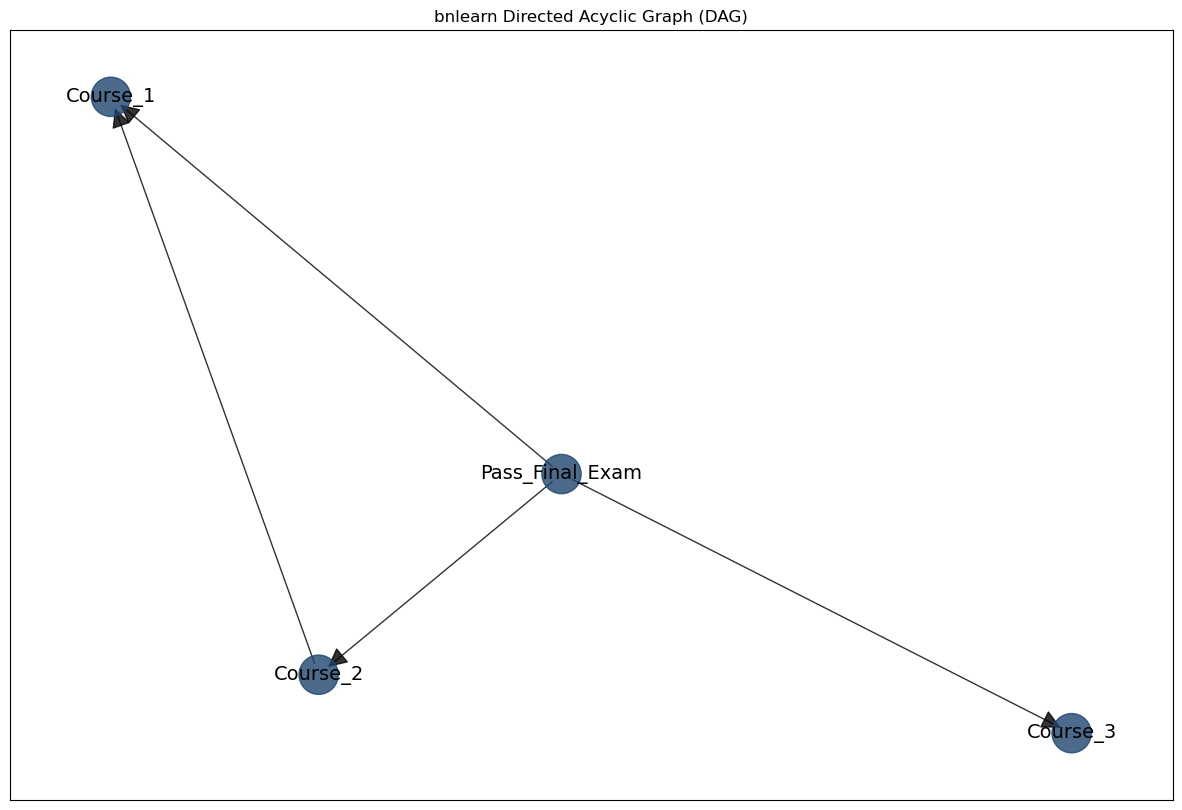

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Course_1': array([-0.61507226,  0.50218117]),
  'Course_2': array([-0.33545472,  0.33425443]),
  'Course_3': array([0.67786206, 0.31726667]),
  'Course_4': array([ 0.68381937, -0.54626803]),
  'Course_5': array([-0.40250751, -1.        ]),
  'Pass_Final_Exam': array([-0.00864696,  0.39256575])},
 'G': <networkx.classes.digraph.DiGraph at 0x1b58b62e790>,
 'node_properties': {'Course_1': {'node_color': '#1f456e', 'node_size': 800},
  'Course_2': {'node_color': '#1f456e', 'node_size': 800},
  'Course_3': {'node_color': '#1f456e', 'node_size': 800},
  'Course_4': {'node_color': '#1f456e', 'node_size': 800},
  'Course_5': {'node_color': '#1f456e', 'node_size': 800},
  'Pass_Final_Exam': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('Course_2', 'Course_1'): {'color': '#000000',
   'weight': 1},
  ('Pass_Final_Exam', 'Course_1'): {'color': '#000000', 'weight': 1},
  ('Pass_

In [9]:
#plot Bayesian network derived from dataset
bn.plot(model)

Script 10-3: A second Bayesian network with different fitting algorithm

In [14]:
#fit Bayesian network
model = bn.structure_learning.fit(Course_Data.iloc[:,0:3], methodtype='ex')

[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


In [15]:
#print dependencies
print(model['adjmat'])

target    Course_1  Course_2  Course_3
source                                
Course_1     False      True      True
Course_2     False     False      True
Course_3     False     False     False


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


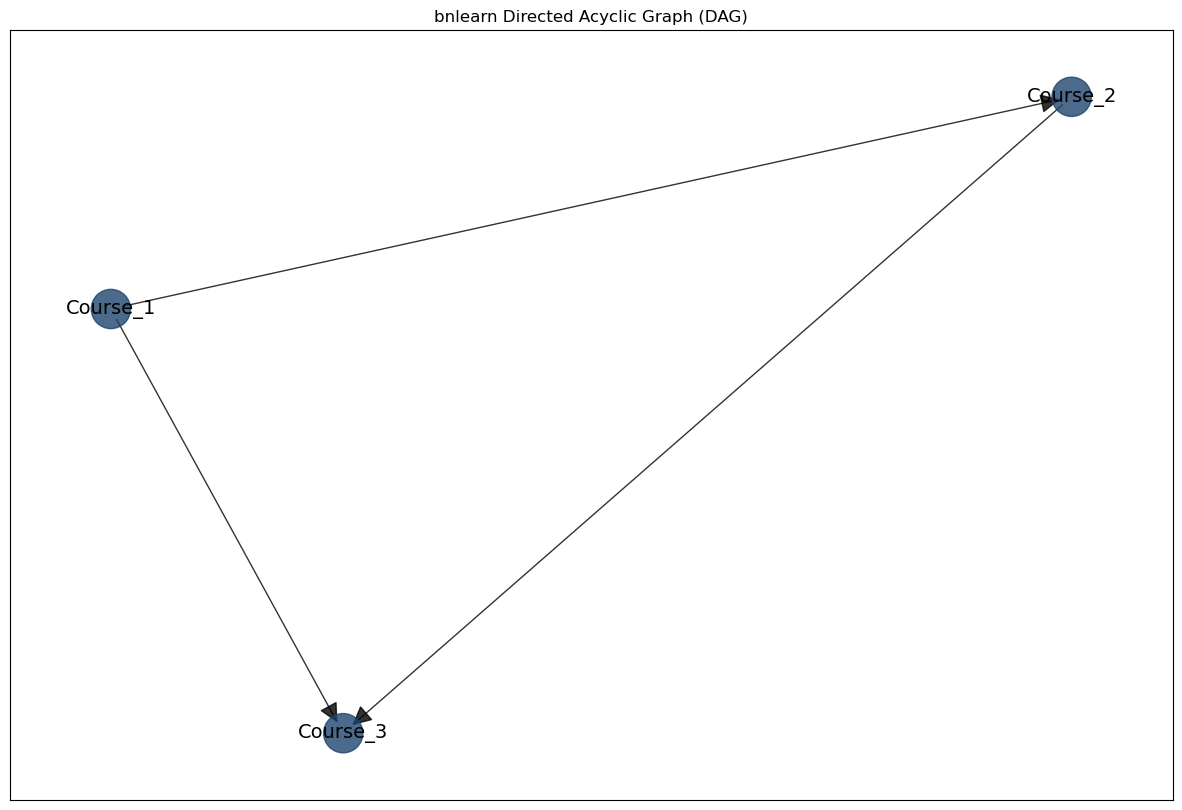

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Course_1': array([-0.41115324,  0.19992096]),
  'Course_2': array([0.58209633, 0.80007904]),
  'Course_3': array([-0.17094309, -1.        ])},
 'G': <networkx.classes.digraph.DiGraph at 0x1b58e88dbe0>,
 'node_properties': {'Course_1': {'node_color': '#1f456e', 'node_size': 800},
  'Course_2': {'node_color': '#1f456e', 'node_size': 800},
  'Course_3': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('Course_1', 'Course_2'): {'color': '#000000',
   'weight': 1},
  ('Course_1', 'Course_3'): {'color': '#000000', 'weight': 1},
  ('Course_2', 'Course_3'): {'color': '#000000', 'weight': 1}}}

In [16]:
#plot Bayesian network derived from dataset
bn.plot(model)